In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


In [2]:
%%time
from acs_plotting_maps import *
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors, cm


CPU times: user 8.97 s, sys: 2.12 s, total: 11.1 s
Wall time: 16.6 s


In [12]:
name='ncra_regions'
regions=None
ds_gwl15=None
ds_gwl20=None
ds_gwl30=None
station_df=None
stippling=None
mask_not_australia=True
mask_australia=False
agcd_mask=False
facecolor="none"
edgecolor="black"
figsize=(10, 4)
title=None
date_range=""
crs=None
area_linewidth=0.3
xlim=(114,154)
ylim=(-43, -8)
cmap=cm.Greens
cmap_bad="lightgrey"
cbar_extend="both"
ticks=None
tick_labels=None
cbar_label=""
baseline=None
dataset_name=None
issued_date=None
label_states=False
contourf=False
contour=False
select_area=None
land_shadow=False
watermark="EXPERIMENTAL\nIMAGE ONLY"
watermark_color = "r"
show_logo = False
infile=None
outfile=None
savefig=True

regions = regions_dict["ncra_regions"]
regions = regions.to_crs(crs = "GDA2020")

In [4]:
%%time
var = "fire_climate_class"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12.nc")[var]
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL15.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL2.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL3.nc")[var]



CPU times: user 4.74 s, sys: 2.99 s, total: 7.73 s
Wall time: 16.2 s


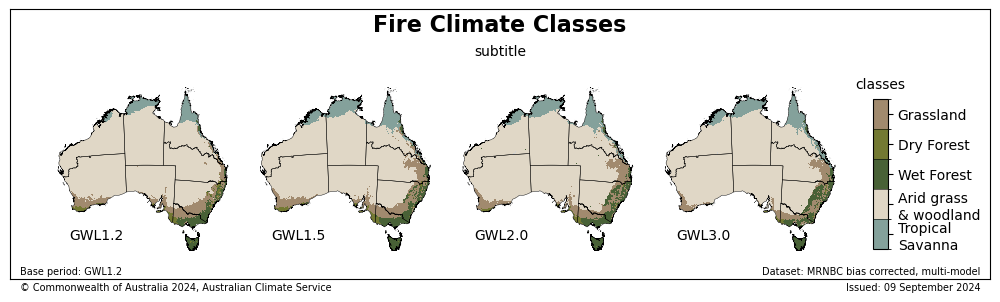

In [6]:
title = "Fire Climate Classes"
baseline="GWL1.2"
cmap = cmap_dict["fire_climate"]
ticks = tick_dict["fire_climate_ticks"]
tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",]
cbar_label = "classes"
dataset_name = "MRNBC bias corrected, multi-model"
watermark=""
figsize=(10, 3)
date_range="subtitle"


crs = ccrs.LambertConformal(
            central_latitude=-24.75,
            central_longitude=134.0,
            cutoff=30,
            standard_parallels=(-10, -40),
        )

fig, axs = plt.subplots(nrows=1, ncols=4,  sharey=True, sharex=True, figsize=figsize, subplot_kw={'projection': crs, "frame_on":False},)

cmap.set_bad(cmap_bad)
for i, ds in enumerate([ds_gwl12, ds_gwl15, ds_gwl20, ds_gwl30]):
    ax, norm, cont, middle_ticks = plot_data(regions=regions,
                                          data=ds, 
                                          station_df = station_df,
                                          xlim=xlim,
                                          ylim=ylim,
                                          cmap=cmap,
                                          cbar_extend=cbar_extend,
                                          ticks=ticks,
                                          tick_labels=tick_labels,
                                          contourf=contourf,
                                          contour=contour,
                                          ax=axs[i],
                                          figsize=figsize,
                                          subtitle=f"GWL{[1.2,1.5,2.0,3.0][i]}",
                                          facecolor=facecolor,
                                          mask_not_australia = mask_not_australia,
                                          mask_australia=mask_australia,
                                          agcd_mask=agcd_mask,
                                          area_linewidth=area_linewidth,
                                          stippling=stippling)
    
    # if select a specific area -----------
    ax = plot_select_area(select_area=select_area, 
                          ax=ax,
                          xlim=xlim,
                          ylim=ylim,
                          regions=regions,
                          land_shadow=land_shadow,
                          area_linewidth=area_linewidth,
                          )
    # ---------------------------------------------

                
    ax.axis('off')

# colorbar -----------------------------------------------------------
fig.subplots_adjust(left=0.05, bottom=0, right=0.85, top=0.95, wspace=0.05, hspace=0.05)
cbar_ax = fig.add_axes([0.87, 0.2, 0.03, 0.5]) #left bottom width height
cbar_ax.axis('off')

ax = plot_cbar(cont=cont,
              norm=norm,
              ax=cbar_ax,
              cbar_extend=cbar_extend, 
              cbar_label=cbar_label,
              ticks=ticks, 
              tick_labels=tick_labels,
              middle_ticks=middle_ticks,
              cax_bounds = [0.1,0,0.5,1],)
#------------------------------------------


# plot border and annotations -----------------
ax111 = fig.add_axes([0.01,0.1,0.98,0.9], facecolor="none", xticks=[], yticks=[]) #(left, bottom, width, height)

# text annotation xy locations for 3-panel plot
text_xy_3pp = {"title": (0.5, 0.9),
           "date_range": (0.5, 0.87),
           "watermark": (0.45, 0.41),}

ax111 = plot_titles(title=title,
                    date_range = date_range, 
                    baseline = baseline, 
                    dataset_name= dataset_name,
                    issued_date=issued_date,
                    watermark=watermark, 
                    watermark_color=watermark_color,
                    ax=ax111,
                    text_xy = text_xy_3pp,
                    title_ha = "center",
               )
ax111.axis(True)
# --------------------------------------------

if outfile is None:
    PATH = os.path.abspath(os.getcwd())
    outfile = f"{PATH}/figures/{title.replace(' ', '_')}.png"
    os.makedirs(os.path.dirname(outfile), exist_ok=True)

if savefig:
    plt.savefig(outfile, dpi=300)


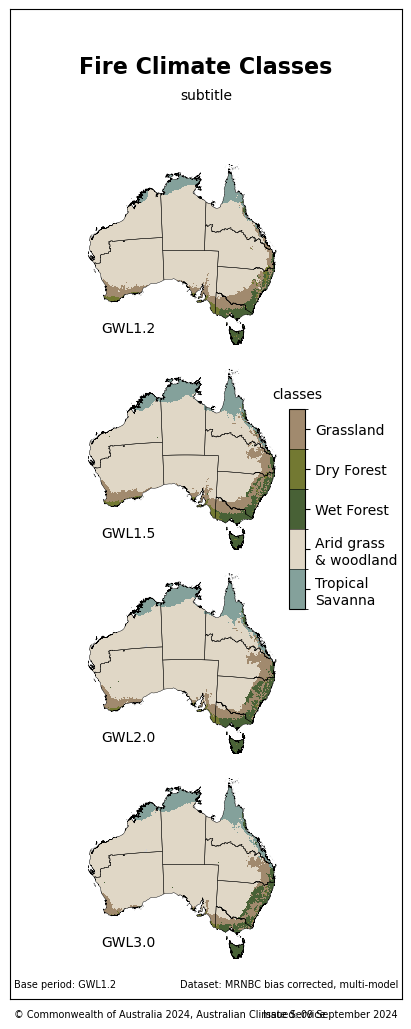

In [7]:
title = "Fire Climate Classes"
baseline="GWL1.2"
cmap = cmap_dict["fire_climate"]
ticks = tick_dict["fire_climate_ticks"]
tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",]
cbar_label = "classes"
dataset_name = "MRNBC bias corrected, multi-model"
watermark=""
figsize=(4, 10)
date_range="subtitle"


fig, axs = plt.subplots(nrows=4, ncols=1,  sharey=True, sharex=True, figsize=figsize, subplot_kw={'projection': crs, "frame_on":False},)

cmap.set_bad(cmap_bad)
for i, ds in enumerate([ds_gwl12, ds_gwl15, ds_gwl20, ds_gwl30]):
    ax, norm, cont, middle_ticks = plot_data(regions=regions,
                                          data=ds, 
                                          station_df = station_df,
                                          xlim=xlim,
                                          ylim=ylim,
                                          cmap=cmap,
                                          cbar_extend=cbar_extend,
                                          ticks=ticks,
                                          tick_labels=tick_labels,
                                          contourf=contourf,
                                          contour=contour,
                                          ax=axs[i],
                                          figsize=figsize,
                                          subtitle=f"GWL{[1.2,1.5,2.0,3.0][i]}",
                                          facecolor=facecolor,
                                          mask_not_australia = mask_not_australia,
                                          mask_australia=mask_australia,
                                          agcd_mask=agcd_mask,
                                          area_linewidth=area_linewidth,
                                          stippling=stippling)
    
    # if select a specific area -----------
    ax = plot_select_area(select_area=select_area, 
                          ax=ax,
                          xlim=xlim,
                          ylim=ylim,
                          regions=regions,
                          land_shadow=land_shadow,
                          area_linewidth=area_linewidth,
                          )
    # ---------------------------------------------

                
    ax.axis('off')

# colorbar -----------------------------------------------------------
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.85, top=0.85, wspace=0.05, hspace=0.1)
cbar_ax = fig.add_axes([0.7, 0.4, 0.08, 0.2]) #left bottom width height
cbar_ax.axis('off')

ax = plot_cbar(cont=cont,
              norm=norm,
              ax=cbar_ax,
              cbar_extend=cbar_extend, 
              cbar_label=cbar_label,
              ticks=ticks, 
              tick_labels=tick_labels,
              middle_ticks=middle_ticks,
              cax_bounds = [0.1,0,0.5,1],)
#------------------------------------------


# plot border and annotations -----------------
ax111 = fig.add_axes([0.01,0.01,0.98,0.99], facecolor="none", xticks=[], yticks=[]) #(left, bottom, width, height)

# text annotation xy locations for 3-panel plot
text_xy_3pp = {"title": (0.5, 0.93),
           "date_range": (0.5, 0.92),
           "watermark": (0.45, 0.41),}

ax111 = plot_titles(title=title,
                    date_range = date_range, 
                    baseline = baseline, 
                    dataset_name= dataset_name,
                    issued_date=issued_date,
                    watermark=watermark, 
                    watermark_color=watermark_color,
                    ax=ax111,
                    text_xy = text_xy_3pp,
                    title_ha = "center",
               )
ax111.axis(True)
# --------------------------------------------

if outfile is None:
    PATH = os.path.abspath(os.getcwd())
    outfile = f"{PATH}/figures/{title.replace(' ', '_')}.png"
    os.makedirs(os.path.dirname(outfile), exist_ok=True)

if savefig:
    plt.savefig(outfile, dpi=300)

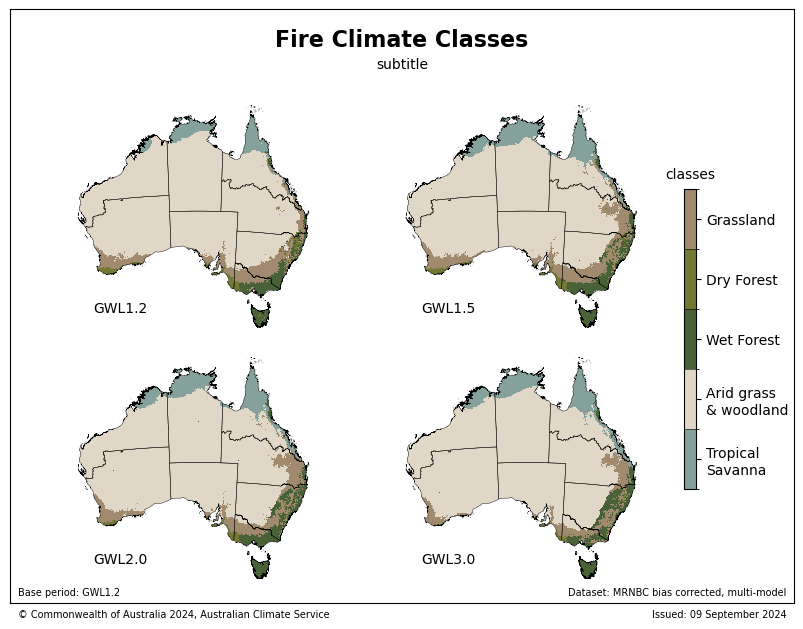

In [8]:
title = "Fire Climate Classes"
baseline="GWL1.2"
cmap = cmap_dict["fire_climate"]
ticks = tick_dict["fire_climate_ticks"]
tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",]
cbar_label = "classes"
dataset_name = "MRNBC bias corrected, multi-model"
watermark=""
figsize=(8, 6)
date_range="subtitle"


fig, axs = plt.subplots(nrows=2, ncols=2,  sharey=True, sharex=True, figsize=figsize, subplot_kw={'projection': crs, "frame_on":False},)

cmap.set_bad(cmap_bad)
for i, ds in enumerate([ds_gwl12, ds_gwl15, ds_gwl20, ds_gwl30]):
    ax, norm, cont, middle_ticks = plot_data(regions=regions,
                                          data=ds, 
                                          station_df = station_df,
                                          xlim=xlim,
                                          ylim=ylim,
                                          cmap=cmap,
                                          cbar_extend=cbar_extend,
                                          ticks=ticks,
                                          tick_labels=tick_labels,
                                          contourf=contourf,
                                          contour=contour,
                                          ax=axs.flatten()[i],
                                          figsize=figsize,
                                          subtitle=f"GWL{[1.2,1.5,2.0,3.0][i]}",
                                          facecolor=facecolor,
                                          mask_not_australia = mask_not_australia,
                                          mask_australia=mask_australia,
                                          agcd_mask=agcd_mask,
                                          area_linewidth=area_linewidth,
                                          stippling=stippling)
    
    # if select a specific area -----------
    ax = plot_select_area(select_area=select_area, 
                          ax=ax,
                          xlim=xlim,
                          ylim=ylim,
                          regions=regions,
                          land_shadow=land_shadow,
                          area_linewidth=area_linewidth,
                          )
    # ---------------------------------------------

                
    ax.axis('off')

# colorbar -----------------------------------------------------------
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.85, top=0.85, wspace=0.05, hspace=0.1)
cbar_ax = fig.add_axes([0.85, 0.2, 0.03, 0.5]) #left bottom width height
cbar_ax.axis('off')

ax = plot_cbar(cont=cont,
              norm=norm,
              ax=cbar_ax,
              cbar_extend=cbar_extend, 
              cbar_label=cbar_label,
              ticks=ticks, 
              tick_labels=tick_labels,
              middle_ticks=middle_ticks,
              cax_bounds = [0.1,0,0.5,1],)
#------------------------------------------


# plot border and annotations -----------------
ax111 = fig.add_axes([0.01,0.01,0.98,0.99], facecolor="none", xticks=[], yticks=[]) #(left, bottom, width, height)

# text annotation xy locations for 3-panel plot
text_xy_3pp = {"title": (0.5, 0.93),
           "date_range": (0.5, 0.92),
           "watermark": (0.45, 0.41),}

ax111 = plot_titles(title=title,
                    date_range = date_range, 
                    baseline = baseline, 
                    dataset_name= dataset_name,
                    issued_date=issued_date,
                    watermark=watermark, 
                    watermark_color=watermark_color,
                    ax=ax111,
                    text_xy = text_xy_3pp,
                    title_ha = "center",
               )
ax111.axis(True)
# --------------------------------------------

if outfile is None:
    PATH = os.path.abspath(os.getcwd())
    outfile = f"{PATH}/figures/{title.replace(' ', '_')}.png"
    os.makedirs(os.path.dirname(outfile), exist_ok=True)

if savefig:
    plt.savefig(outfile, dpi=300)

CPU times: user 11.5 s, sys: 9.56 ms, total: 11.5 s
Wall time: 11.5 s


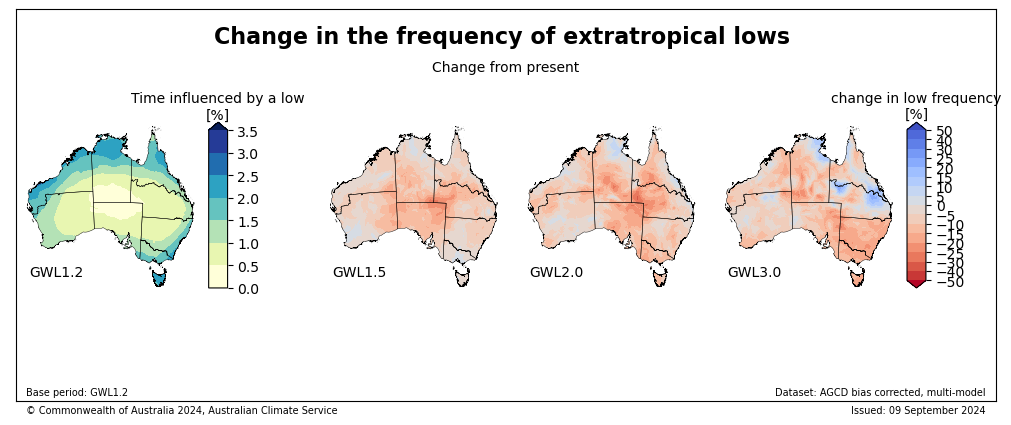

In [99]:
%%time
var = "low_freq"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL12.nc")[var]*100
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL15_change.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL20_change.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL30_change.nc")[var]

regions = regions
title = "Change in the frequency of extratropical lows "
baseline="GWL1.2"
date_range="Change from present"
cmap = cmap_dict["anom_coolwarm_r"]
ticks = [-50, -40, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 40, 50]
cbar_label = "change in low frequency\n[%]"
dataset_name = "AGCD bias corrected, multi-model"
contour=False
contourf=False
cbar_extend="both"
watermark=""
figsize=(10,4)
xlim=(112,152)

baseline_kwargs={"cmap": cmap_dict["pr"],
                 "cbar_extend":"max",
                 "ticks":np.arange(0,4, 0.5),
                 "tick_labels":None,
                 "cbar_label":"Time influenced by a low\n[%]"}
        


crs = ccrs.LambertConformal(
            central_latitude=-24.75,
            central_longitude=134.0,
            cutoff=30,
            standard_parallels=(-10, -40),
        )

fig, axs = plt.subplots(nrows=1, ncols=4,  sharey=True, sharex=True, figsize=figsize, layout="constrained", subplot_kw={'projection': crs, "frame_on":False,}, gridspec_kw={"width_ratios":[1, 1,1,1],})

cmap.set_bad(cmap_bad)

cax_bounds = [1.05,0,0.1,1]

ax, norm, cont, middle_ticks = plot_data(regions=regions,
                                      data=ds_gwl12, 
                                      xlim=xlim,
                                      ylim=ylim,
                                      cmap=baseline_kwargs["cmap"],
                                      cbar_extend=baseline_kwargs["cbar_extend"],
                                      ticks=baseline_kwargs["ticks"],
                                      tick_labels=tick_labels,
                                      contourf=contourf,
                                      contour=contour,
                                      ax=axs[0],
                                      figsize=figsize,
                                      subtitle=f"GWL1.2",
                                      facecolor=facecolor,
                                      mask_not_australia = mask_not_australia,
                                      mask_australia=mask_australia,
                                      agcd_mask=agcd_mask,
                                      area_linewidth=area_linewidth,
                                      stippling=stippling)
ax = plot_cbar(cont=cont,
      norm=norm,
      ax=axs[0],
      cbar_extend=baseline_kwargs["cbar_extend"], 
      cbar_label=baseline_kwargs["cbar_label"],
      ticks=baseline_kwargs["ticks"], 
      tick_labels=tick_labels,
      middle_ticks=middle_ticks,
      cax_bounds =cax_bounds,)


for i, ds in enumerate([ds_gwl15, ds_gwl20, ds_gwl30]):
    ax, norm, cont, middle_ticks = plot_data(regions=regions,
                                              data=ds, 
                                              xlim=xlim,
                                              ylim=ylim,
                                              cmap=cmap,
                                              cbar_extend=cbar_extend,
                                              ticks=ticks,
                                              tick_labels=tick_labels,
                                              contourf=contourf,
                                              contour=contour,
                                              ax=axs[i+1],
                                              figsize=figsize,
                                              subtitle=f"GWL{[1.5,2.0,3.0][i]}",
                                              facecolor=facecolor,
                                              mask_not_australia = mask_not_australia,
                                              mask_australia=mask_australia,
                                              agcd_mask=agcd_mask,
                                              area_linewidth=area_linewidth,
                                              stippling=stippling)
    
    # if select a specific area -----------
    ax = plot_select_area(select_area=select_area, 
                          ax=ax,
                          xlim=xlim,
                          ylim=ylim,
                          regions=regions,
                          land_shadow=land_shadow,
                          area_linewidth=area_linewidth,
                          )
    # ---------------------------------------------

                
    ax.axis('off')

# colorbar -----------------------------------------------------------
# fig.subplots_adjust( wspace=0.02, hspace=0.02)
# cbar_ax = fig.add_axes([0.87, 0.2, 0.03, 0.5]) #left bottom width height
# cbar_ax.axis('off')

ax = plot_cbar(cont=cont,
              norm=norm,
              ax=axs[-1],
              cbar_extend=cbar_extend, 
              cbar_label=cbar_label,
              ticks=ticks, 
              tick_labels=tick_labels,
              middle_ticks=middle_ticks,
              cax_bounds =cax_bounds,)
#------------------------------------------


# plot border and annotations -----------------
ax111 = fig.add_axes([0.01,0.01,0.98,0.98], facecolor="none", xticks=[], yticks=[]) #(left, bottom, width, height)

# text annotation xy locations for 3-panel plot
text_xy_3pp = {"title": (0.5, 0.9),
           "date_range": (0.5, 0.87),
           "watermark": (0.45, 0.41),}

ax111 = plot_titles(title=title,
                    date_range = date_range, 
                    baseline = baseline, 
                    dataset_name= dataset_name,
                    issued_date=issued_date,
                    watermark=watermark, 
                    watermark_color=watermark_color,
                    ax=ax111,
                    text_xy = text_xy_3pp,
                    title_ha = "center",
               )
ax111.axis(True)
# --------------------------------------------

if outfile is None:
    PATH = os.path.abspath(os.getcwd())
    outfile = f"{PATH}/figures/{title.replace(' ', '_')}.png"
    os.makedirs(os.path.dirname(outfile), exist_ok=True)

if savefig:
    plt.savefig(outfile, dpi=300)



CPU times: user 10.6 s, sys: 256 ms, total: 10.9 s
Wall time: 12.2 s


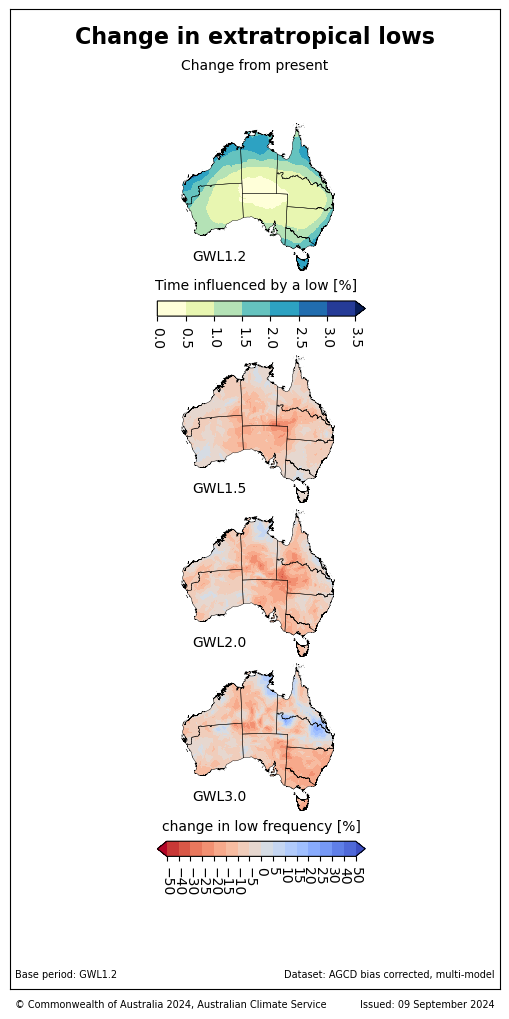

In [80]:
%%time
var = "low_freq"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL12.nc")[var]*100
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL15_change.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL20_change.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL30_change.nc")[var]

regions = regions
title = "Change in extratropical lows"
baseline="GWL1.2"
date_range="Change from present"
cmap = cmap_dict["anom_coolwarm_r"]
ticks = [-50, -40, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 40, 50]
cbar_label = "change in low frequency [%]"
dataset_name = "AGCD bias corrected, multi-model"
contour=False
contourf=False
cbar_extend="both"
watermark=""
figsize=(5,10)

cax_bounds = [-0.1,-0.3,1.2,0.1]

baseline_kwargs={"cmap": cmap_dict["pr"],
                 "cbar_extend":"max",
                 "ticks":np.arange(0,4, 0.5),
                 "tick_labels":None,
                 "cbar_label":"Time influenced by a low [%]"}

crs = ccrs.LambertConformal(
            central_latitude=-24.75,
            central_longitude=134.0,
            cutoff=30,
            standard_parallels=(-10, -40),
        )

fig, axs = plt.subplots(nrows=6, ncols=1,  sharey=True, sharex=True, figsize=figsize, subplot_kw={'projection': crs, "frame_on":False}, gridspec_kw={"height_ratios":[1,0.5, 1,1,1,0.5],})

cmap.set_bad(cmap_bad)

ax, norm, cont, middle_ticks = plot_data(regions=regions,
                                      data=ds_gwl12, 
                                      xlim=xlim,
                                      ylim=ylim,
                                      cmap=baseline_kwargs["cmap"],
                                      cbar_extend=baseline_kwargs["cbar_extend"],
                                      ticks=baseline_kwargs["ticks"],
                                      tick_labels=tick_labels,
                                      contourf=contourf,
                                      contour=contour,
                                      ax=axs[0],
                                      figsize=figsize,
                                      subtitle=f"GWL1.2",
                                      facecolor=facecolor,
                                      mask_not_australia = mask_not_australia,
                                      mask_australia=mask_australia,
                                      agcd_mask=agcd_mask,
                                      area_linewidth=area_linewidth,
                                      stippling=stippling)
cbar = plot_cbar(cont=cont,
              norm=norm,
              ax=axs[0],
              cbar_extend=baseline_kwargs["cbar_extend"], 
              cbar_label=baseline_kwargs["cbar_label"],
              ticks=baseline_kwargs["ticks"], 
              tick_labels=tick_labels,
              middle_ticks=middle_ticks,
              cax_bounds=cax_bounds,
              location="bottom")
cbar.ax.tick_params(rotation=-90)


for i, ds in enumerate([ds_gwl15, ds_gwl20, ds_gwl30]):
    ax, norm, cont, middle_ticks = plot_data(regions=regions,
                                              data=ds, 
                                              xlim=xlim,
                                              ylim=ylim,
                                              cmap=cmap,
                                              cbar_extend=cbar_extend,
                                              ticks=ticks,
                                              tick_labels=tick_labels,
                                              contourf=contourf,
                                              contour=contour,
                                              ax=axs[i+2],
                                              figsize=figsize,
                                              subtitle=f"GWL{[1.5,2.0,3.0][i]}",
                                              facecolor=facecolor,
                                              mask_not_australia = mask_not_australia,
                                              mask_australia=mask_australia,
                                              agcd_mask=agcd_mask,
                                              area_linewidth=area_linewidth,
                                              stippling=stippling)
    
    # if select a specific area -----------
    ax = plot_select_area(select_area=select_area, 
                          ax=ax,
                          xlim=xlim,
                          ylim=ylim,
                          regions=regions,
                          land_shadow=land_shadow,
                          area_linewidth=area_linewidth,
                          )
    # ---------------------------------------------

                
    ax.axis('off')

# colorbar -----------------------------------------------------------
fig.subplots_adjust(wspace=0.02, hspace=0.02)
# cbar_ax = fig.add_axes([0.87, 0.2, 0.03, 0.5]) #left bottom width height
# cbar_ax.axis('off')

cbar = plot_cbar(cont=cont,
              norm=norm,
              ax=axs[-2],
              cbar_extend=cbar_extend, 
              cbar_label=cbar_label,
              ticks=ticks, 
              tick_labels=tick_labels,
              middle_ticks=middle_ticks,
              cax_bounds =cax_bounds,
              location="bottom")
cbar.ax.tick_params(rotation=-90)

#------------------------------------------


# plot border and annotations -----------------
ax111 = fig.add_axes([0.01,0.01,0.98,0.98], facecolor="none", xticks=[], yticks=[]) #(left, bottom, width, height)

# text annotation xy locations for 3-panel plot
text_xy_3pp = {"title": (0.5, 0.96),
           "date_range": (0.5, 0.95),
           "watermark": (0.45, 0.41),}

ax111 = plot_titles(title=title,
                    date_range = date_range, 
                    baseline = baseline, 
                    dataset_name= dataset_name,
                    issued_date=issued_date,
                    watermark=watermark, 
                    watermark_color=watermark_color,
                    ax=ax111,
                    text_xy = text_xy_3pp,
                    title_ha = "center",
               )
ax111.axis(True)
# --------------------------------------------

if outfile is None:
    PATH = os.path.abspath(os.getcwd())
    outfile = f"{PATH}/figures/{title.replace(' ', '_')}.png"
    os.makedirs(os.path.dirname(outfile), exist_ok=True)

if savefig:
    plt.savefig(outfile, dpi=300)


In [70]:
def plot_cbar(cont=None,
              norm=None,
              ax=None,
              cbar_extend=None, 
              cbar_label=None,
              ticks=None, 
              tick_labels=None,
              middle_ticks=[], 
              cax_bounds =None,
              contour=False,
              contourf=False,
              location=None,):
    """This function defines and plots the colorbar"""

    if cax_bounds is not None:
        cax = ax.inset_axes(cax_bounds)
    else:
        cax=None
    
    cbar = None
    
    if norm is None:
        return cbar
    
    if tick_labels is None:
        cbar = plt.colorbar(
            cont,
            ax=ax,
            extend=cbar_extend,
            cax=cax,
            ticks=ticks,
            norm=norm,
            location=location,fraction=0.046, pad=0.04
        )
    else:
        # for categorical data
        cbar = plt.colorbar(
            cont,
            ax=ax,
            extend='neither',
            cax=cax,
            ticks=ticks,
            norm=norm,
            drawedges=True,
            location=location,fraction=0.046, pad=0.04
        )
        if len(ticks) == len(tick_labels):
            cbar.ax.set_yticks(ticks, tick_labels)
        elif len(middle_ticks) == len(tick_labels):
            cbar.ax.set_yticks(middle_ticks, tick_labels)

    cbar.ax.tick_params(labelsize=10)
    if contour and tick_labels is None:
        cbar.add_lines(cont)
    
    # Label colorbar
    if cbar is not None:
        cbar.ax.set_title(cbar_label, zorder=10, loc="center", fontsize=10, verticalalignment="bottom")
    return cbar